%load_ext nb_black
%load_ext lab_black

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<IPython.core.display.Javascript object>

In [249]:
dataset = pd.read_csv(
    "TSLA.csv",
    na_values=["null"],
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True,
)

<IPython.core.display.Javascript object>

In [250]:
Y = pd.DataFrame(dataset["Adj Close"])
features = ["Open", "High", "Low", "Volume"]

<IPython.core.display.Javascript object>

In [251]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(dataset[features])
X = pd.DataFrame(columns=features, data=feature_transform, index=dataset.index)
X.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.000465,0.001350,0.000422,0.306605
2010-06-30,0.001568,0.002224,0.001371,0.280640
2010-07-01,0.001439,0.001498,0.000871,0.133184
2010-07-02,0.001114,0.001043,0.000614,0.082560
2010-07-06,0.000627,0.000543,0.000140,0.110956


<IPython.core.display.Javascript object>

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

<IPython.core.display.Javascript object>

In [253]:
X_train = X_train.sort_values(by="Date")
Y_train = Y_train.sort_values(by="Date")
X_test = X_test.sort_values(by="Date")
Y_test = Y_test.sort_values(by="Date")

<IPython.core.display.Javascript object>

In [254]:
open_train = X_train["Open"]
open_test = X_test["Open"]

<IPython.core.display.Javascript object>

In [255]:
high_train = X_train["High"]
high_test = X_test["High"]

<IPython.core.display.Javascript object>

In [256]:
low_train = X_train["Low"]
low_test = X_test["Low"]

<IPython.core.display.Javascript object>

In [257]:
vol_train = X_train["Volume"]
vol_test = X_test["Volume"]

<IPython.core.display.Javascript object>

In [258]:
X_train = X_train.index
X_test = X_test.index

<IPython.core.display.Javascript object>

In [259]:
X_test = pd.to_datetime(X_test)
X_test = X_test.strftime("%d.%m.%Y")
X_test = pd.DataFrame(X_test, columns=["Date"])
X_test["Year"] = pd.DatetimeIndex(X_test["Date"]).year
X_test["Month"] = pd.DatetimeIndex(X_test["Date"]).month
X_test["Day"] = pd.DatetimeIndex(X_test["Date"]).day

d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '22.07.2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.07.2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.08.2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.09.2010' in DD/MM/Y

<IPython.core.display.Javascript object>

In [260]:
X_train = pd.to_datetime(X_train)
X_train = X_train.strftime("%d.%m.%Y")
X_train = pd.DataFrame(X_train, columns=["Date"])
X_train["Year"] = pd.DatetimeIndex(X_train["Date"]).year
X_train["Month"] = pd.DatetimeIndex(X_train["Date"]).month
X_train["Day"] = pd.DatetimeIndex(X_train["Date"]).day

d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29.06.2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30.06.2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13.07.2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
d:\Machine Learning\My Code\machine-learning\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14.07.2010' in DD/MM/Y

<IPython.core.display.Javascript object>

X_train = np.array(X_train)
X_test = np.array(X_test)

In [261]:
open_train = np.array(open_train)
high_train = np.array(high_train)
low_train = np.array(low_train)
vol_train = np.array(vol_train)

<IPython.core.display.Javascript object>

In [262]:
open_test = np.array(open_test)
high_test = np.array(high_test)
low_test = np.array(low_test)
vol_test = np.array(vol_test)

<IPython.core.display.Javascript object>

In [263]:
X_train

,Date,Year,Month,Day
0,29.06.2010,2010,6,29
1,30.06.2010,2010,6,30
2,01.07.2010,2010,1,7
3,02.07.2010,2010,2,7
4,06.07.2010,2010,6,7
...,...,...,...,...
2623,26.01.2022,2022,1,26
2624,27.01.2022,2022,1,27
2625,31.01.2022,2022,1,31
2626,01.02.2022,2022,1,2


<IPython.core.display.Javascript object>

In [264]:
X_train = np.array(X_train.iloc[:, 1:])
X_test = np.array(X_test.iloc[:, 1:])

<IPython.core.display.Javascript object>

In [271]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

<IPython.core.display.Javascript object>

In [275]:
X_train

array([[[2010,    6,   29]],

       [[2010,    6,   30]],

       [[2010,    1,    7]],

       ...,

       [[2022,    1,   31]],

       [[2022,    1,    2]],

       [[2022,    2,    2]]], dtype=int64)

<IPython.core.display.Javascript object>

In [276]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, 3), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


<IPython.core.display.Javascript object>

In [282]:
open_reg = lstm.fit(
    X_train,
    open_train,
    epochs=250,
    validation_data=(X_test, open_test),
    batch_size=2,
    verbose=1,
)

Epoch 1/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1486 - val_loss: 0.1048
Epoch 2/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1860 - val_loss: 0.0532
Epoch 3/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1514 - val_loss: 0.0285
Epoch 4/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1901 - val_loss: 0.0325
Epoch 5/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1827 - val_loss: 0.0277
Epoch 6/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1970 - val_loss: 0.4741
Epoch 7/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1597 - val_loss: 0.0741
Epoch 8/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1782 - val_loss: 0.0997
Epoch 9/250
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1560 - val_loss: 0.1077
Epoch 10/250
1314/1314 [==============================] - 3s 2ms/step - l

<IPython.core.display.Javascript object>

In [283]:
high_pred = lstm.predict(X_test)

<IPython.core.display.Javascript object>

In [285]:
high_pred_2 = lstm.predict(X_train)

<IPython.core.display.Javascript object>

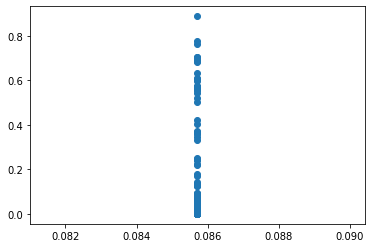

<IPython.core.display.Javascript object>

In [284]:
plt.scatter(high_pred, high_test)

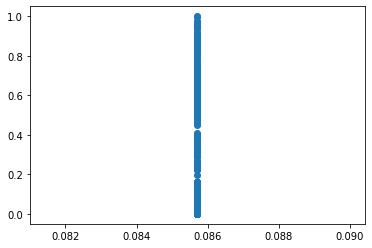

<IPython.core.display.Javascript object>

In [286]:
plt.scatter(high_pred_2, high_train)

In [270]:
high_test.shape

(293,)

<IPython.core.display.Javascript object>